In [1]:
!pip install pandas numpy scikit-learn tensorflow

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('bank_marketing_RETO_DS_AS.csv')

In [4]:
print(data.head())  # Muestra las primeras filas
print(data.info())  # Muestra tipos de datos y valores faltantes
print(data.describe())  # Resumen estadístico

   age            job  marital  education default  balance housing loan  \
0   31  self-employed  married   tertiary      no     2666      no   no   
1   29     unemployed   single    unknown      no     1584      no   no   
2   41    blue-collar  married  secondary      no     2152     yes   no   
3   50    blue-collar  married  secondary      no       84     yes   no   
4   40         admin.  married  secondary      no        0      no   no   

    contact  day month  duration  campaign  pdays  previous poutcome    y  
0  cellular   10   nov       318         2     97         6  success  yes  
1  cellular    6   sep       245         1     -1         0  unknown  yes  
2  cellular   17   nov       369         1     -1         0  unknown   no  
3  cellular   17   jul        18         8     -1         0  unknown   no  
4  cellular   28   jul       496         2    182        11  success  yes  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total

In [5]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for col in categorical_columns:
    data[col] = LabelEncoder().fit_transform(data[col])

In [6]:
from sklearn.preprocessing import StandardScaler
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [7]:
X = data.drop('y', axis=1)  # Variables independientes
y = LabelEncoder().fit_transform(data['y'])  # Variable dependiente (objetivo)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [9]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [10]:
y_val_pred = logistic_model.predict(X_val)
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

[[900 158]
 [218 524]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1058
           1       0.77      0.71      0.74       742

    accuracy                           0.79      1800
   macro avg       0.79      0.78      0.78      1800
weighted avg       0.79      0.79      0.79      1800



In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

nn_model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5575 - loss: 0.8402 - val_accuracy: 0.6206 - val_loss: 0.6364
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6654 - loss: 0.6028 - val_accuracy: 0.7333 - val_loss: 0.5355
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7554 - loss: 0.5153 - val_accuracy: 0.7583 - val_loss: 0.4819
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7828 - loss: 0.4619 - val_accuracy: 0.7833 - val_loss: 0.4631
Epoch 5/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7974 - loss: 0.4418 - val_accuracy: 0.7994 - val_loss: 0.4553
Epoch 6/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8112 - loss: 0.4253 - val_accuracy: 0.7917 - val_loss: 0.4513
Epoch 7/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7932 - loss: 0.4352 - val_accuracy: 0.7889 - val_loss: 0.4488
Epoch 8/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8143 - loss: 0.4131 - val_accuracy: 0.

In [13]:
y_val_pred_nn = (nn_model.predict(X_val) > 0.5).astype(int)
print(confusion_matrix(y_val, y_val_pred_nn))
print(classification_report(y_val, y_val_pred_nn))

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[[857 201]
 [169 573]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1058
           1       0.74      0.77      0.76       742

    accuracy                           0.79      1800
   macro avg       0.79      0.79      0.79      1800
weighted avg       0.80      0.79      0.80      1800



In [14]:
y_test_pred = logistic_model.predict(X_test)  # Cambia a `nn_model` si es mejor
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[878 127]
 [220 575]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      1005
           1       0.82      0.72      0.77       795

    accuracy                           0.81      1800
   macro avg       0.81      0.80      0.80      1800
weighted avg       0.81      0.81      0.81      1800



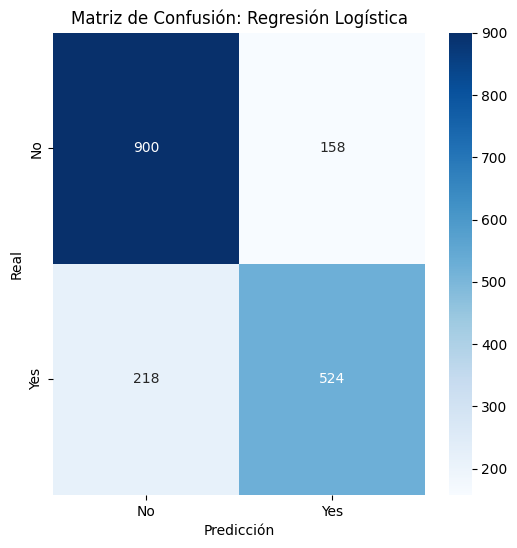

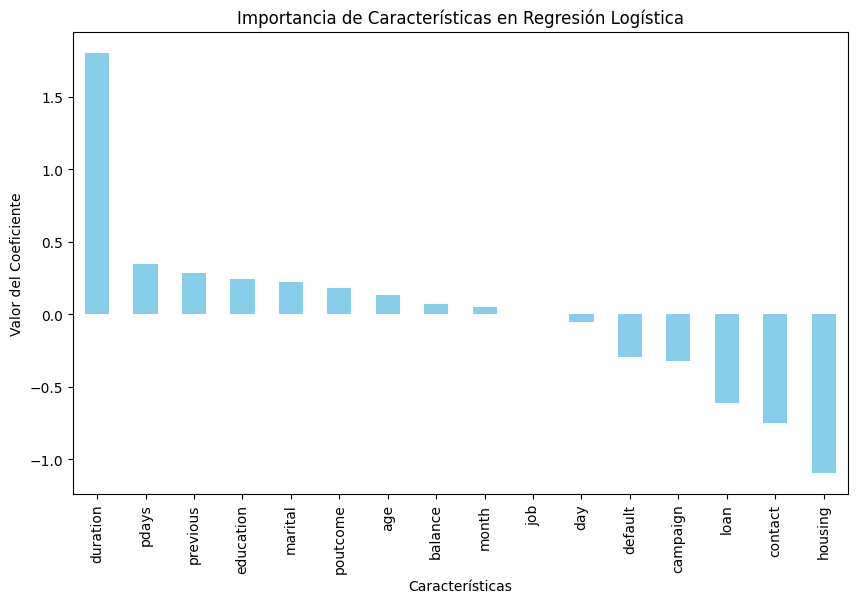

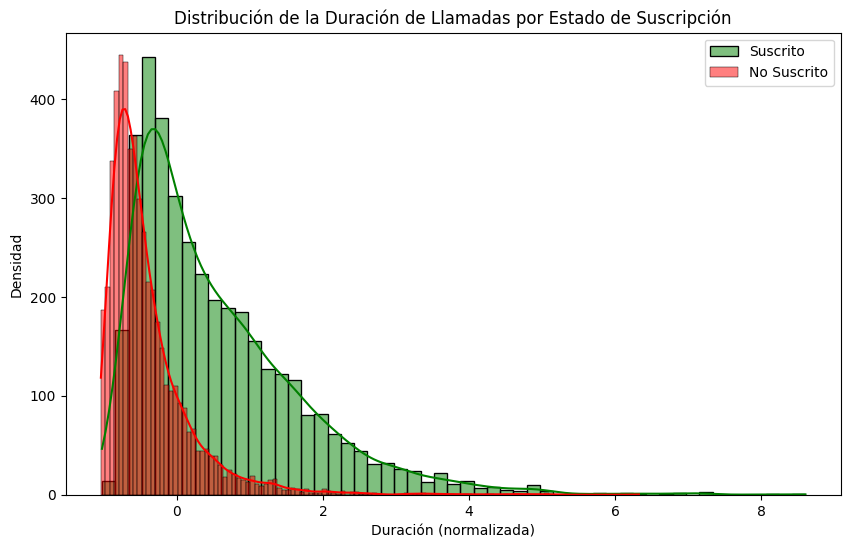

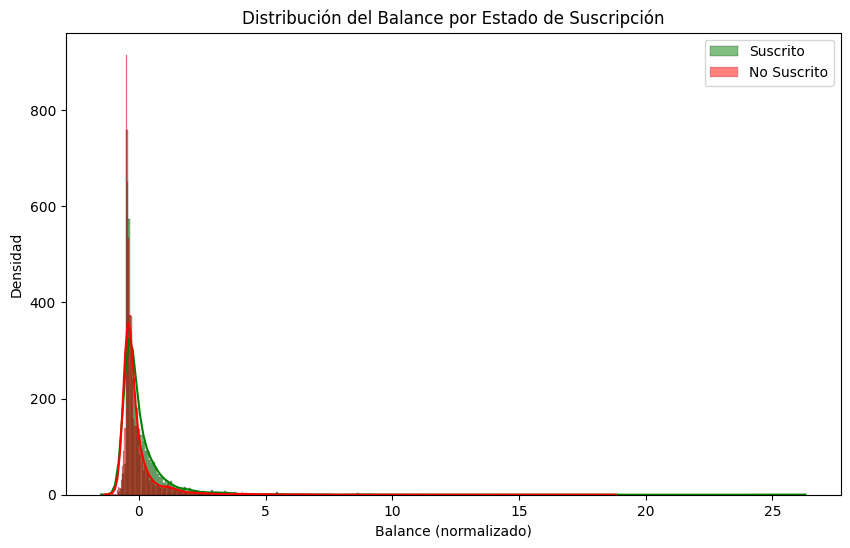

In [15]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Cargar los datos
data = pd.read_csv('bank_marketing_RETO_DS_AS.csv')

# Transformar variables categóricas con LabelEncoder
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for col in categorical_columns:
    data[col] = LabelEncoder().fit_transform(data[col])

# Escalar variables numéricas
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Definir las variables independientes (X) y dependientes (y)
X = data.drop('y', axis=1)
y = LabelEncoder().fit_transform(data['y'])

# Dividir los datos en conjuntos de entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Entrenar modelo de Regresión Logística
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_val_pred = logistic_model.predict(X_val)

# Generar matriz de confusión
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Graficar matriz de confusión
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Matriz de Confusión: Regresión Logística")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Importancia de características desde Regresión Logística
feature_importance = pd.Series(logistic_model.coef_[0], index=X.columns).sort_values(ascending=False)

# Graficar importancia de características
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar', color='skyblue')
plt.title("Importancia de Características en Regresión Logística")
plt.xlabel("Características")
plt.ylabel("Valor del Coeficiente")
plt.show()

# Distribución de la duración de la llamada por estado de suscripción
plt.figure(figsize=(10, 6))
sns.histplot(data[data['y'] == 'yes']['duration'], kde=True, color='green', label='Suscrito')
sns.histplot(data[data['y'] == 'no']['duration'], kde=True, color='red', label='No Suscrito')
plt.title("Distribución de la Duración de Llamadas por Estado de Suscripción")
plt.xlabel("Duración (normalizada)")
plt.ylabel("Densidad")
plt.legend()
plt.show()

# Distribución del balance promedio por estado de suscripción
plt.figure(figsize=(10, 6))
sns.histplot(data[data['y'] == 'yes']['balance'], kde=True, color='green', label='Suscrito')
sns.histplot(data[data['y'] == 'no']['balance'], kde=True, color='red', label='No Suscrito')
plt.title("Distribución del Balance por Estado de Suscripción")
plt.xlabel("Balance (normalizado)")
plt.ylabel("Densidad")
plt.legend()
plt.show()